6.5 Machine Learning Part 2

This script contains the following:

1. Importing libraries and data and renaming columns

2. The elbow technique

3. k-means clustering


1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Creating Path
path = r'/Users/mac/Documents/Achievement 6_Project'

In [4]:
#Importing Suidcide Data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_clean.csv'), index_col = False)

In [20]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2.156625e+09,796,Boomers


In [22]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,4.455809e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,2.602020e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.812070e+13,126352.000000


In [23]:
# Replacing the missing values in the HDI with mean value
df['HDI for year'].fillna(0.776601, inplace=True)

In [25]:
df_suic = df[['suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)']]

In [5]:
df.shape

(27820, 12)

In [26]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.776601,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.776601,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.776601,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.776601,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.776601,2.156625e+09,796,Boomers


2. The elbow technique

In [45]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [46]:
score = [kmeans[i].fit(df_suic).score(df_suic) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-4.256967967072734e+17,
 -1.3962143585464283e+17,
 -6.6212240904042696e+16,
 -4.2165742007032856e+16,
 -2.1289420505239252e+16,
 -1.5840714146003192e+16,
 -1.2181374832775264e+16,
 -8941277046645219.0,
 -7112514274180829.0]

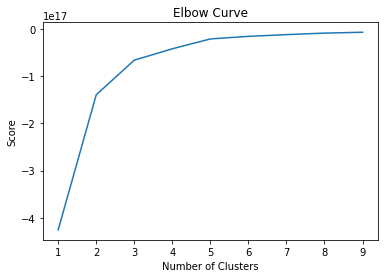

In [29]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There are jumps from 1 to 2, 2 to 3 and 3 to 5. Optimum count of cluster is 5

3. k-means clustering

In [47]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5, n_jobs = -1)

In [48]:

# Fit the k-means object to the data.

kmeans.fit(df_suic)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=5, n_jobs=-1)

In [49]:
df_suic['clusters'] = kmeans.fit_predict(df_suic)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/var/folders/fb/k6fgyvx556b1s8_l_md0szsh0000gn/T/ipykernel_46495/2762219186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_suic['clusters'] = kmeans.fit_predict(df_suic)


In [33]:
df_suic.head()

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),clusters
0,21,312900,6.71,0.776601,796,1
1,16,308000,5.19,0.776601,796,1
2,14,289700,4.83,0.776601,796,1
3,1,21800,4.59,0.776601,796,1
4,9,274300,3.28,0.776601,796,1


In [50]:
df_suic['clusters'].value_counts()

0    22007
2     3840
4     1268
1      632
3       73
Name: clusters, dtype: int64

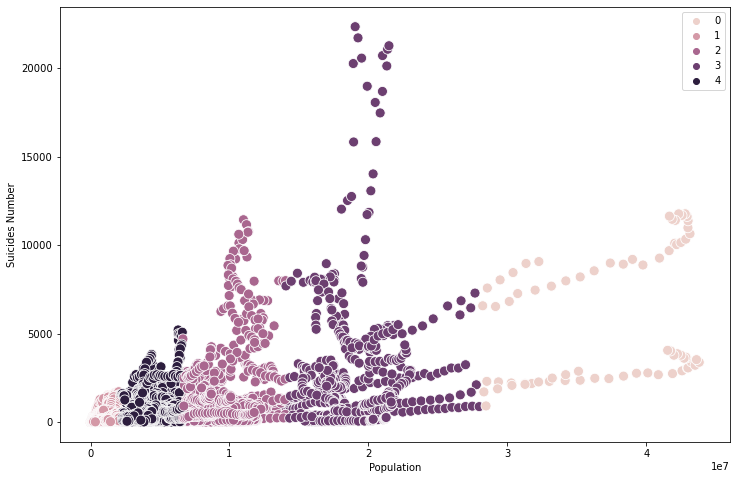

In [35]:
# Plot the clusters for the "suicides_no" and "population" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_suic['population'], y=df_suic['suicides_no'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Population') # Label x-axis.
plt.ylabel('Suicides Number') # Label y-axis.
plt.show()

The first cluster (coded as 0 in the legend) is the most populated cluster, it gethers the data points with very high population and number of suicides not more than 13,000. The second cluster, in pink (coded as 1) include points with the lowest population and relatively low number of suicides. The third cluster in purple (coded as 2) contains points with more population than 1 (in pink) and relatively high number of suicide (between 10000 and 15000). The fourth cluster (coded as 3) contains data points that range from low to the highest number of suicide and the second highest population. The fifth cluster (coded as 4) contain data points with low population and relatively low number of suicide (higher number of suicide than the second cluster).

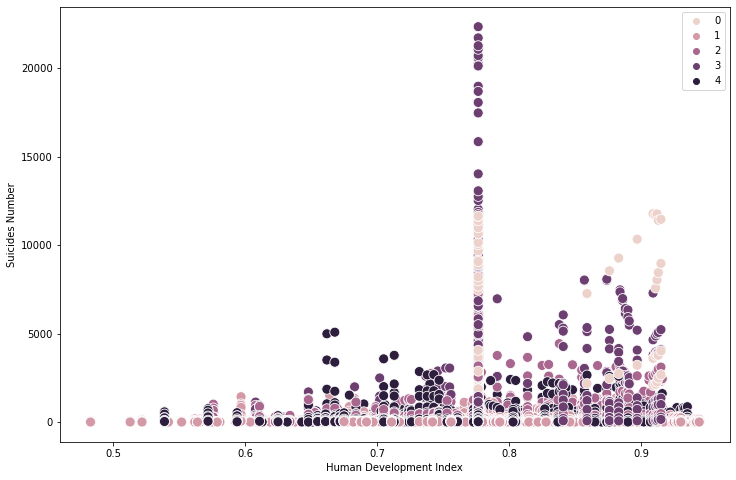

In [36]:
# Plot the clusters for the "HDI" and "suicides no" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_suic['HDI for year'], y=df_suic['suicides_no'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Human Development Index') 
plt.ylabel('Suicides Number') 
plt.show()

The plot above shows that the lowest human development index may not translate to high suicide (as depicted by cluster coded as 1). The cluster coded as 3 having the highest number of suicide does not also translate to the lowest human development index.

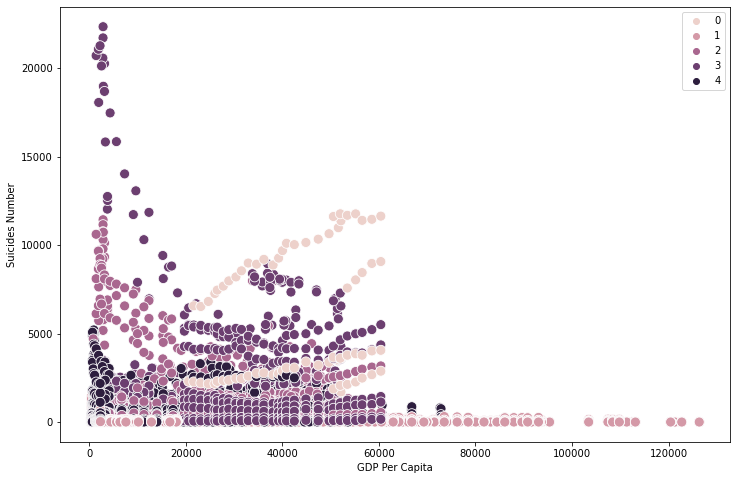

In [37]:
# Plot the clusters for the "GDP per capita" and "suicides no" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_suic['gdp_per_capita ($)'], y=df_suic['suicides_no'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('GDP Per Capita') 
plt.ylabel('Suicides Number') 
plt.show()

The first cluster (coded as 0 in the legend) is the most populated cluster, it gethers the data points with GDP per capita not more than 60000 and number of suicides not more than 13,000. The second cluster, in pink (coded as 1) include points that range from low GDP per capita to the highest GDP per capita and relatively low number of suicides. The third cluster in purple (coded as 2) contains points with GDP per capita not more than 60,000 and relatively high number of suicide (between 10000 and 15000). The fourth cluster (coded as 3) contains data points that range from low to the highest number of suicide and GDP per capita not more than 60000. The fifth cluster (coded as 4) contain data points with GDP per capita as much as between 60000 and 80000 number of suicide well below 10000.

Changing the dependent variable to Suicide per 100,000

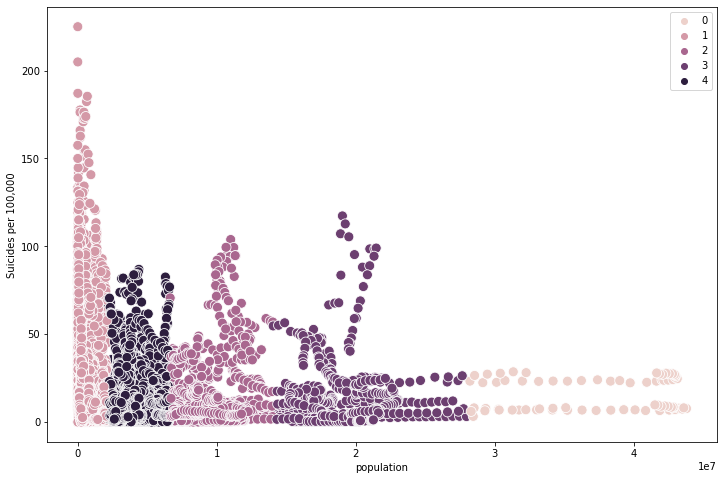

In [38]:
# Plot the clusters for the "population" and "suicides per 100,000" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_suic['population'], y=df_suic['suicides/100k pop'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('population') 
plt.ylabel('Suicides per 100,000') 
plt.show()

The first cluster (coded as 0 in the legend) is the most populated cluster, it gethers the data points with the highest population and number of suicides per 100000 well below 50. The second cluster, in pink (coded as 1) include points that range from the lowest to the highest number of suicides per 100000 and the lowest population. The third cluster in purple (coded as 2) contains points with suicides per 100000 a little over 100 and higher population than cluster 1 and 4. The fourth cluster (coded as 3) contains data points with higher population than cluster 2 and higher number of suicide per 10000 than cluster 2. The fifth cluster (coded as 4) contain data points with population below 1 (below cluster 2)  and number of suicide per 100000 well below 100.

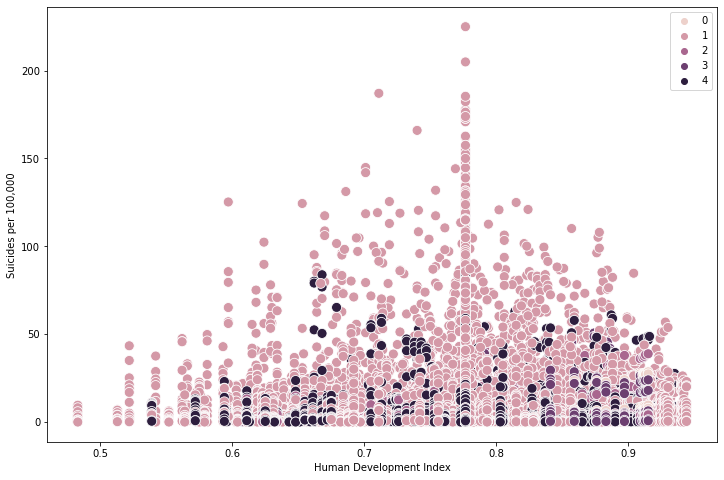

In [39]:
# Plot the clusters for the "HDI" and "suicides per 100,000" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_suic['HDI for year'], y=df_suic['suicides/100k pop'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Human Development Index') 
plt.ylabel('Suicides per 100,000') 
plt.show()

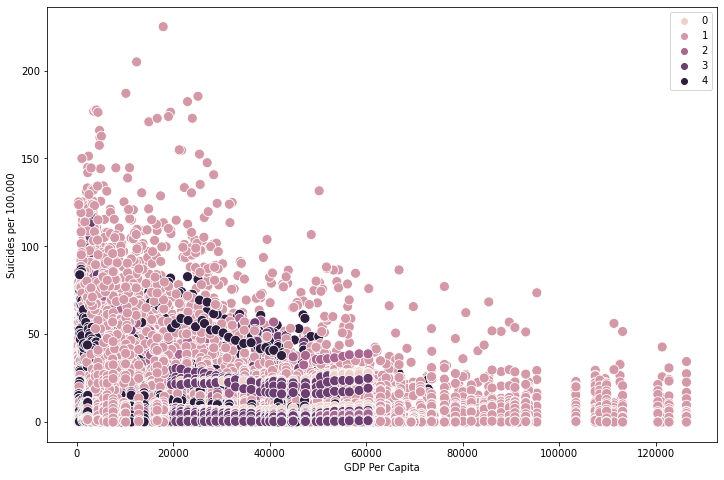

In [41]:
# Plot the clusters for the "GDP Per Capita" and "suicides per 100,000" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_suic['gdp_per_capita ($)'], y=df_suic['suicides/100k pop'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('GDP Per Capita') 
plt.ylabel('Suicides per 100,000') 
plt.show()

The plots for HDI/GDP per capita and suicide per 10000 shows data points that are scatered all over the plot.

In [52]:
df.loc[df_suic['clusters'] == 4, 'cluster'] = 'deep dark purple'
df.loc[df_suic['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df_suic['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df_suic['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df_suic['clusters'] == 0, 'cluster'] = 'light pink'

In [55]:
df_suic.groupby('clusters').agg({'population':['mean', 'median'], 
                         'suicides_no':['mean', 'median'], 
                         'HDI for year':['mean', 'median'],
                          'gdp_per_capita ($)':['mean', 'median']})

population              suicides_no         HDI for year  \
                  mean      median         mean  median         mean   
clusters                                                               
0         4.444598e+05    289400.0    63.690962    12.0     0.775705   
1         1.880002e+07  18149000.0  2619.954114  1361.0     0.786558   
2         3.935868e+06   3784824.0   423.296875   208.0     0.777913   
3         3.731982e+07  39000700.0  5854.383562  3857.0     0.823077   
4         9.322744e+06   9127838.0  1291.902208   795.5     0.780537   

                   gdp_per_capita ($)           
            median               mean   median  
clusters                                        
0         0.776601       16510.396874   8576.0  
1         0.776601       23354.689873  20588.0  
2         0.776601       16745.497917  11525.0  
3         0.776601       42561.273973  44867.0  
4         0.776601       18699.437697  12359.0

The cluster coded as 3 has the highest stats in all the categories. The median value is the highest among the five categories. HDI does not seem to matter much because it has data points in all the 5 categories scattered all over the plot. Population tends to speak a clearer to suicide number/suicide per 10000

Usefulness: These results could be useful for the purpose of analytics that inspire suicide prevention programs vis a vis the above variables and their revelations in terms of relationships